# Hermes Reply — Fase 5 (PT-BR, RM 565066)

## ML — Regressão: prever vibração média móvel (+10 min)

### 1) Leitura e preparação dos dados

In [11]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/data/metricas_ativos_regressao.csv')
df = df.dropna(subset=["VIBRACAO_MM5_FUTURO"]).reset_index(drop=True)
print("Formato:", df.shape)
df.head()


Formato: (5375, 9)


,DATA_HORA,ATIVO_ID,TEMPERATURA,UMIDADE,VIBRACAO,TEMPERATURA_MM5,VIBRACAO_MM5,UMIDADE_MM5,VIBRACAO_MM5_FUTURO
0,2025-07-02T00:00:00,1,63.086,55.078,5.812,63.086000,5.812000,55.078000,4.8554
1,2025-07-02T00:02:00,1,62.252,51.499,4.524,62.669000,5.168000,53.288500,5.0388
2,2025-07-02T00:04:00,1,63.132,56.361,5.104,62.823333,5.146667,54.312667,4.9808
3,2025-07-02T00:06:00,1,62.540,55.219,4.275,62.752500,4.928750,54.539250,4.9578
4,2025-07-02T00:08:00,1,62.096,59.606,5.037,62.621200,4.950400,55.552600,5.0148


### 2) Seleção de features e target

In [12]:

features = ["TEMPERATURA","VIBRACAO","UMIDADE","TEMPERATURA_MM5","VIBRACAO_MM5","UMIDADE_MM5"]
X = df[features].copy()
y = df["VIBRACAO_MM5_FUTURO"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=565066)


### 3) Treino de modelos e comparação

In [14]:
# --- Step 3: treino e comparação (versão sem 'squared=') ---
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_reg(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)   # sem 'squared'
    rmse = float(mse) ** 0.5                   # RMSE = sqrt(MSE)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

models = {
    "LinearRegression": Pipeline([("scaler", StandardScaler()), ("mdl", LinearRegression())]),
    "RandomForest": RandomForestRegressor(n_estimators=180, random_state=565066),
    "GradientBoosting": GradientBoostingRegressor(random_state=565066)
}

results = {}
for name, mdl in models.items():
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    results[name] = eval_reg(y_test, y_pred)

results


{'LinearRegression': {'MAE': 0.21657442263005716,
  'RMSE': 0.28439279993357314,
  'R2': 0.8869816254657605},
 'RandomForest': {'MAE': 0.21866472764857886,
  'RMSE': 0.2883206944552669,
  'R2': 0.8838381570879876},
 'GradientBoosting': {'MAE': 0.2137141592960463,
  'RMSE': 0.27913467782578977,
  'R2': 0.8911221715948648}}

### 4) Escolha do melhor modelo e gráficos

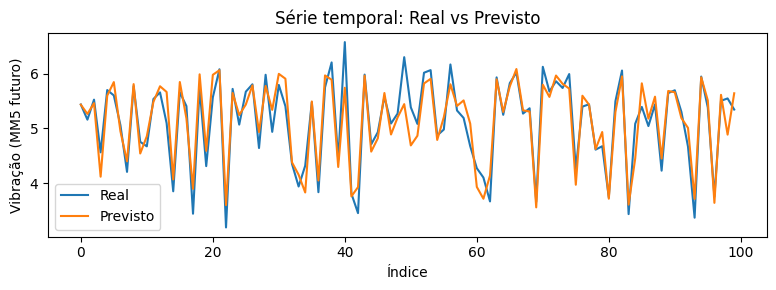

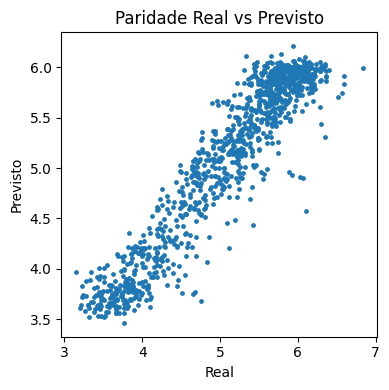

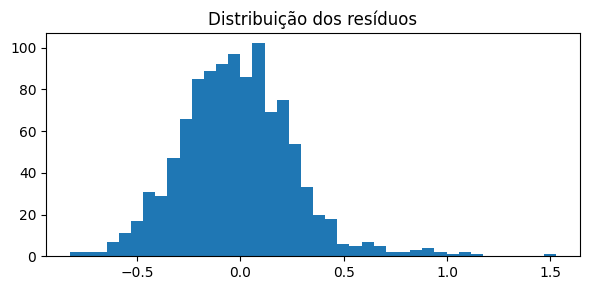

Imagens salvas em: /content/assets


In [16]:
# --- Step 4: gráficos (com criação automática da pasta) ---
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# garante a pasta ./assets ao lado do notebook
outdir = Path("./assets")
outdir.mkdir(parents=True, exist_ok=True)

# 1) Série temporal (primeiras 100 amostras do conjunto de teste)
n = min(100, len(y_test))
plt.figure(figsize=(8,3))
plt.plot(range(n), np.array(y_test)[:n], label="Real")
plt.plot(range(n), np.array(y_pred)[:n], label="Previsto")
plt.title("Série temporal: Real vs Previsto")
plt.xlabel("Índice"); plt.ylabel("Vibração (MM5 futuro)")
plt.legend()
plt.tight_layout()
plt.savefig(outdir / "serie_temporal_reg.png", dpi=170, bbox_inches="tight")
plt.show()

# 2) Dispersão (paridade)
plt.figure(figsize=(4,4))
plt.scatter(y_test, y_pred, s=6)
plt.xlabel("Real"); plt.ylabel("Previsto")
plt.title("Paridade Real vs Previsto")
plt.tight_layout()
plt.savefig(outdir / "paridade_reg.png", dpi=170, bbox_inches="tight")
plt.show()

# 3) Distribuição dos resíduos
res = np.array(y_test) - np.array(y_pred)
plt.figure(figsize=(6,3))
plt.hist(res, bins=40)
plt.title("Distribuição dos resíduos")
plt.tight_layout()
plt.savefig(outdir / "residuos_reg.png", dpi=170, bbox_inches="tight")
plt.show()

print("Imagens salvas em:", outdir.resolve())
